# Egg AI project

## Author: Dravyn, Jasmin, Jeff, Oleks

#### Original Dataset: Md Anowar Hossen Faysal, Md Rasel Ahmed, Md Masudur Rahaman

#### Dataset: https://www.kaggle.com/datasets/faysal1998/environmental-effect-on-egg-production
1. Amount_of_chicken: The number of chickens in the farm or enclosure.

2. Amount_of_Feeding: The quantity of food fed to the chickens, likely in kilograms or pounds.

3. Ammonia: Ammonia level in the chicken coop or enclosure. Ammonia is a gas that is produced by the decomposition of chicken waste and can be harmful to chickens in high concentrations.

4. Temperature: The temperature inside the chicken coop or enclosure, measured in degrees Celsius (C).

5. Humidity: The humidity inside the chicken coop or enclosure, measured in percentage.

6. Light_Intensity: The intensity of light in the chicken coop or enclosure.

7. Noise: The noise level in the chicken coop or enclosure, measured in decibels (dB).

8. Total_egg_production: The total number of eggs produced by the chickens.


**Missing Values** <br>
None

# Look at the Big Picture

## Frame the Problem
1. Supervised Learning
2. A regression task
3. Batch Learning
    - Small data set
    - No continuous flow of data coming into the system
    - No need to adjust to changing data rapidly

In [1]:
# Import libraries

import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Download the dataset

url = "https://raw.githubusercontent.com/ItsJJH/egg-ai-project/develop/Egg_Production.csv"
eggs = pd.read_csv(url, sep=',')

# Let's create a backup copy of the dataset
egg_backup = eggs

In [3]:
eggs

,Amount_of_chicken,Amount_of_Feeding,Ammonia,Temperature,Humidity,Light_Intensity,Noise,Total_egg_production
0,2728,170,14.4,29.3,51.7,364,214,2115
1,2728,175,17.6,29.3,52.3,369,235,1958
2,2728,175,15.0,29.3,52.5,373,237,1990
3,2728,170,15.0,29.3,49.7,372,240,2015
4,2728,170,15.9,29.2,51.4,381,237,2112
...,...,...,...,...,...,...,...,...
476,2735,180,14.4,29.0,49.5,341,224,2065
477,2735,185,14.9,29.5,50.7,317,202,2202
478,2735,180,16.0,29.5,49.3,346,197,1972
479,2732,195,13.4,30.0,51.7,325,183,2120


In [4]:
eggs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Amount_of_chicken     481 non-null    int64  
 1   Amount_of_Feeding     481 non-null    int64  
 2   Ammonia               481 non-null    float64
 3   Temperature           481 non-null    float64
 4   Humidity              481 non-null    float64
 5   Light_Intensity       481 non-null    int64  
 6   Noise                 481 non-null    int64  
 7   Total_egg_production  481 non-null    int64  
dtypes: float64(3), int64(5)
memory usage: 30.2 KB


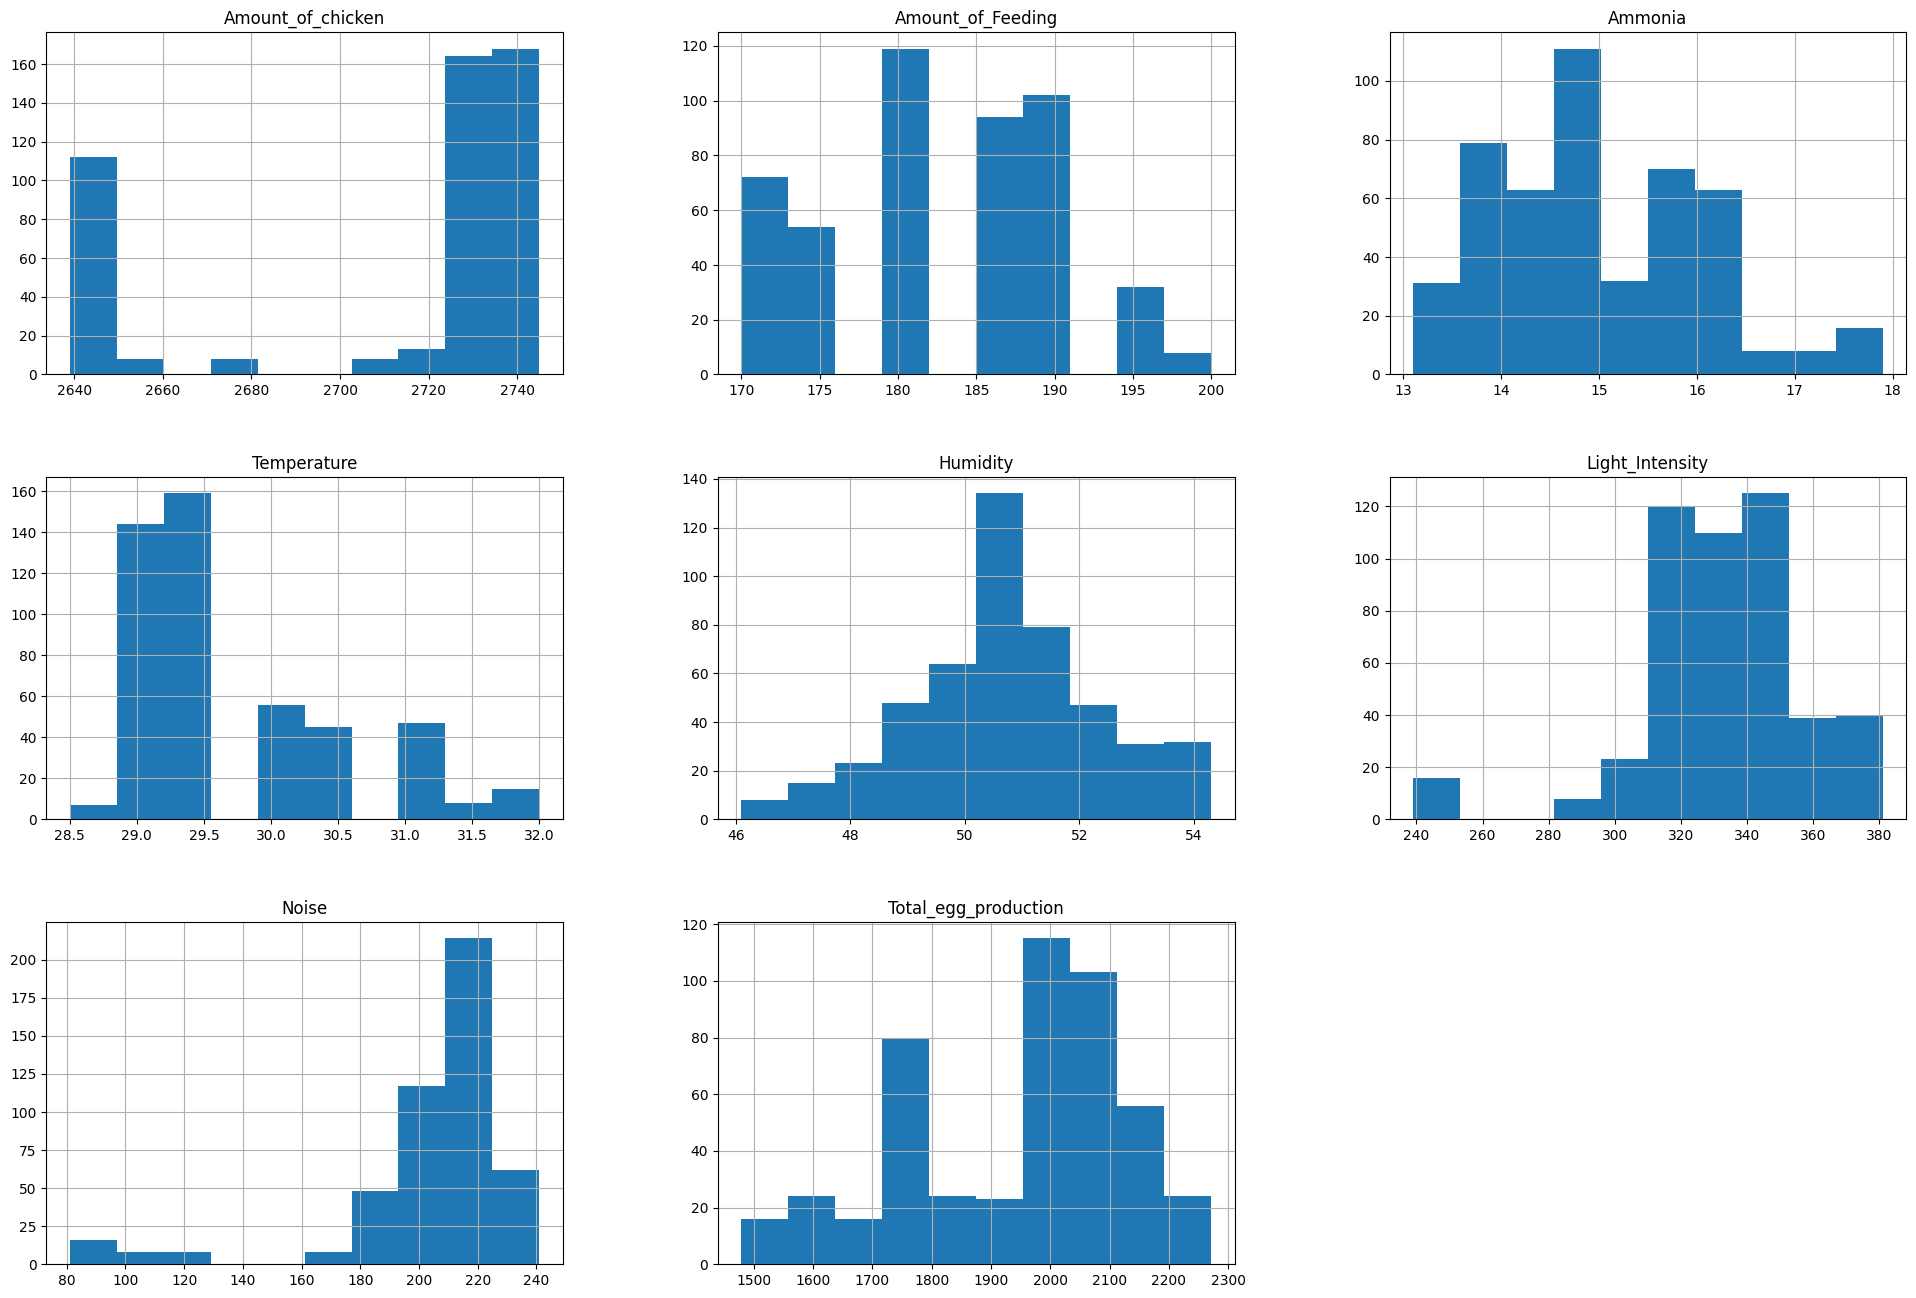

In [5]:
eggs.hist(figsize=(24, 16))
plt.show()

C:\Users\jeffr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


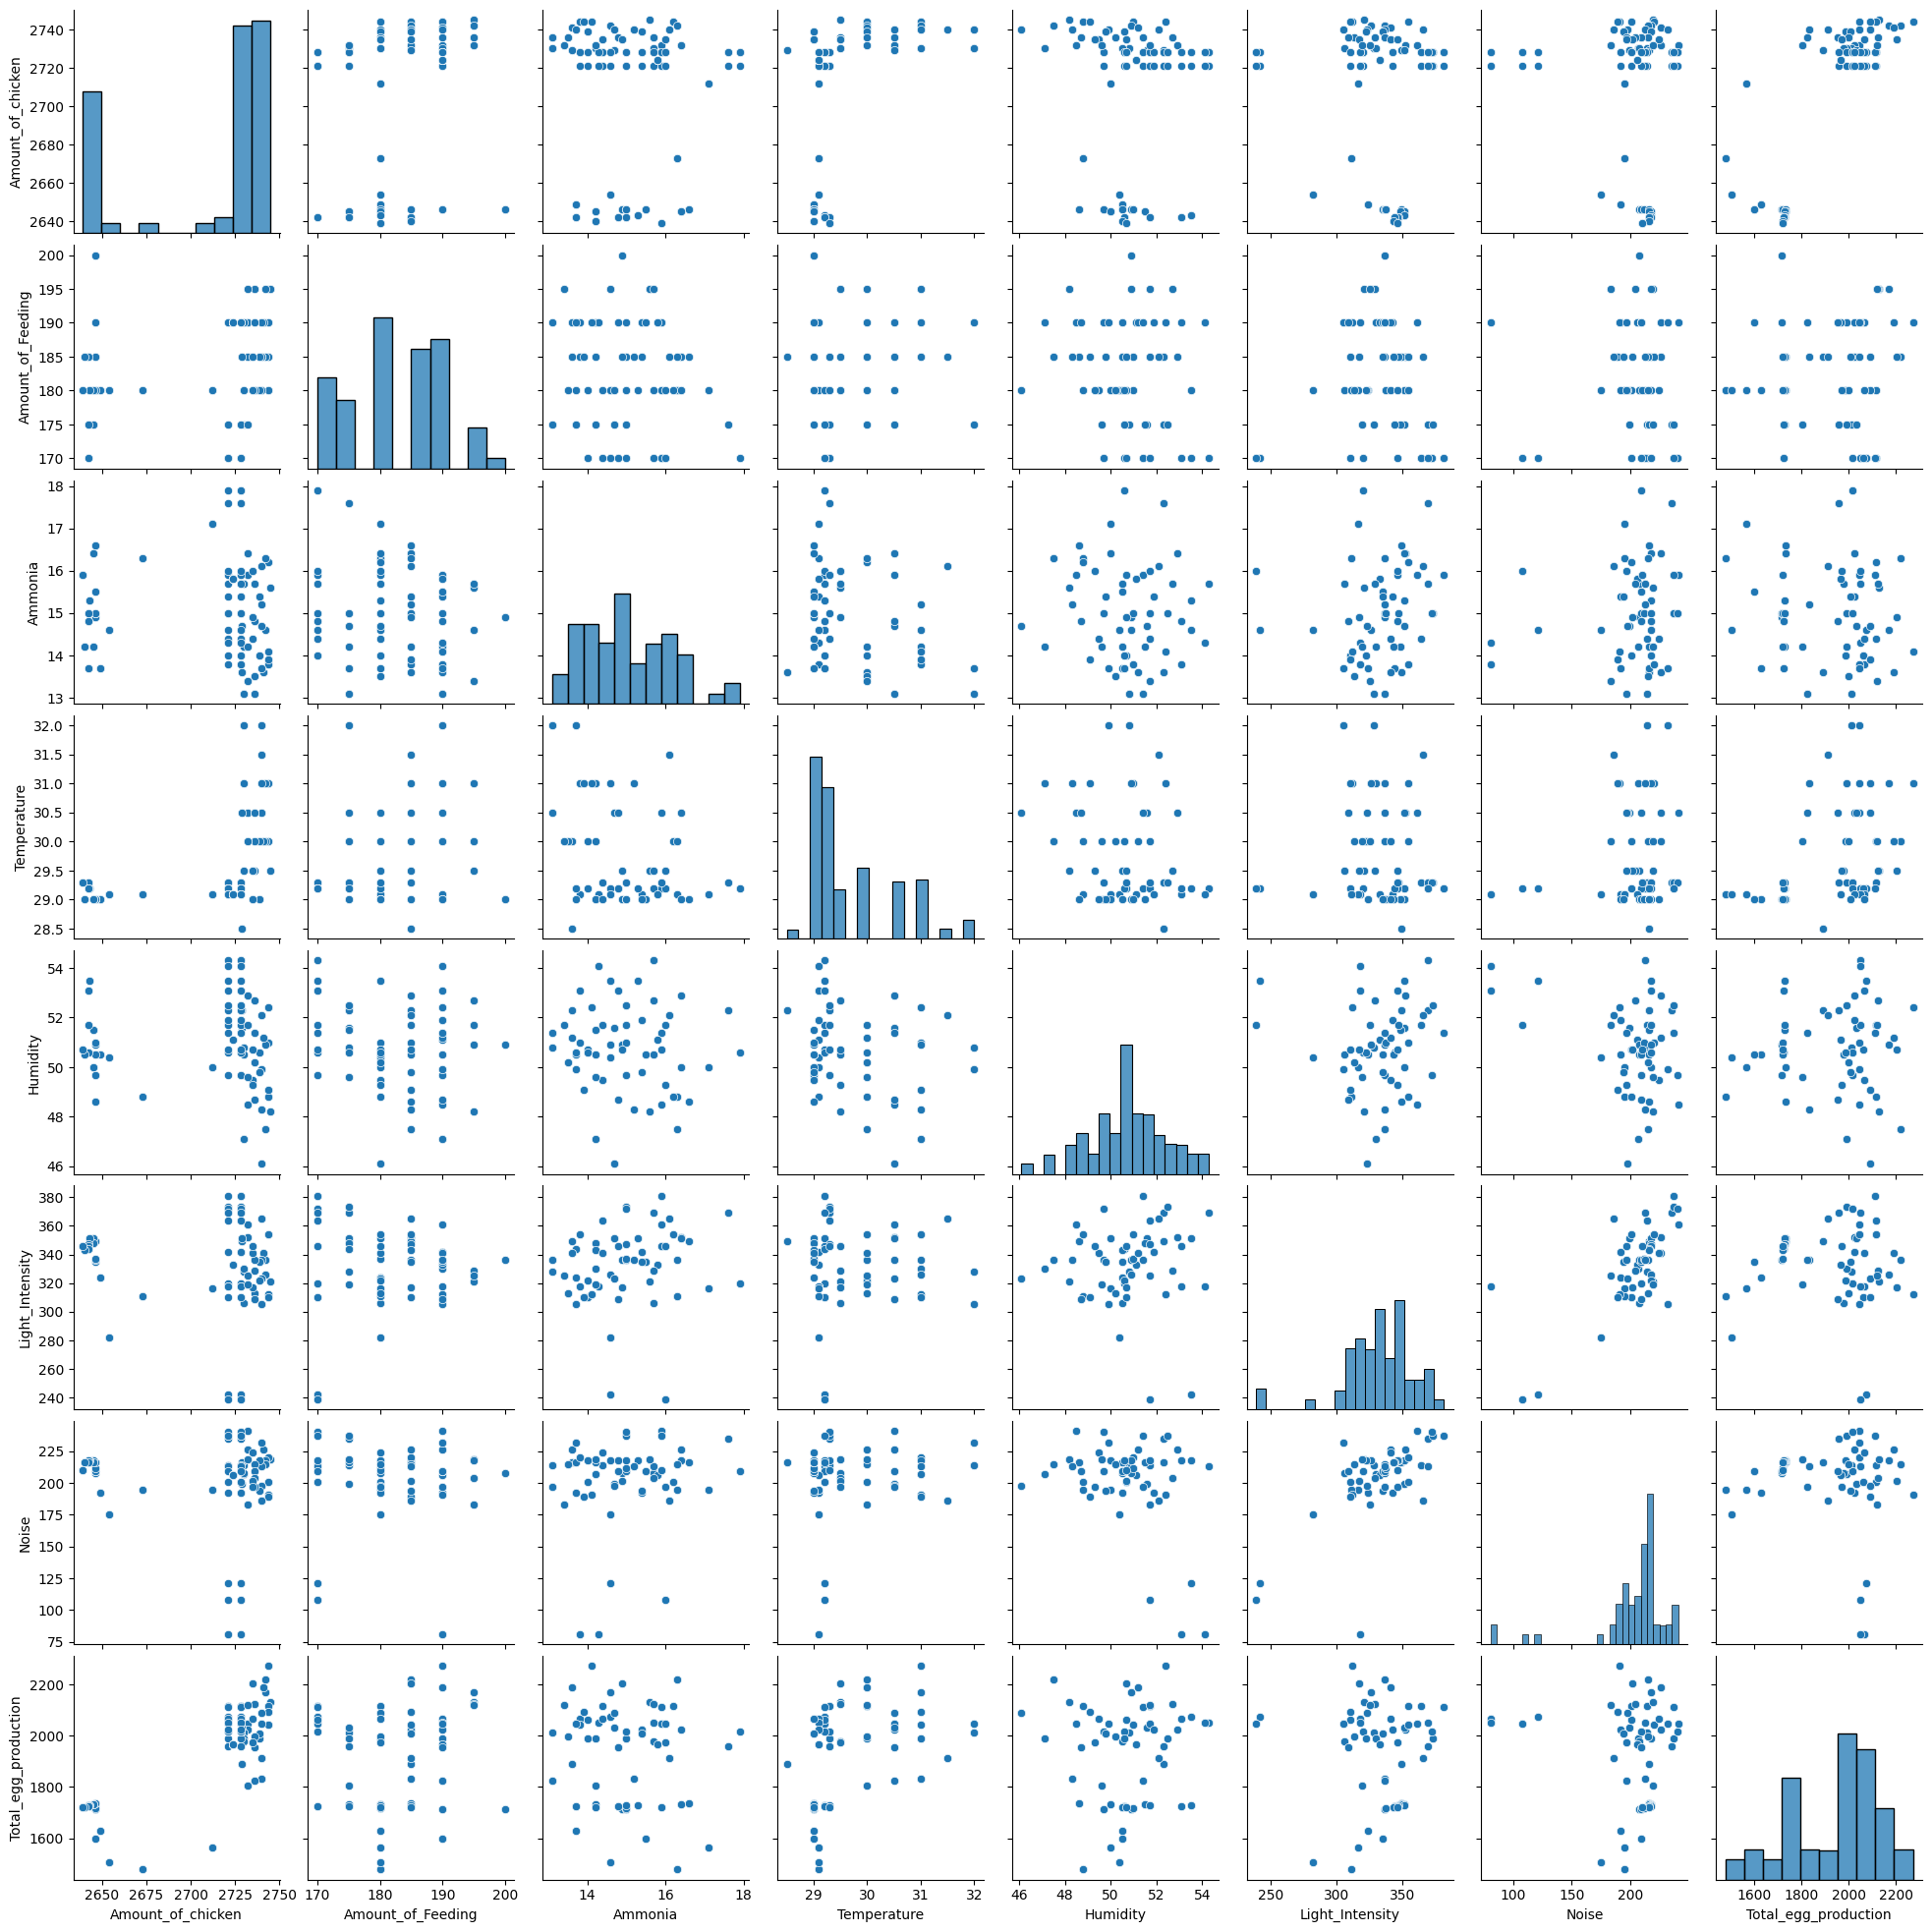

In [6]:
sns.pairplot(eggs)

In [7]:
# eggs.kde()
# plt.show()

In [8]:
eggs.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
476     True
477     True
478     True
479     True
480     True
Length: 481, dtype: bool

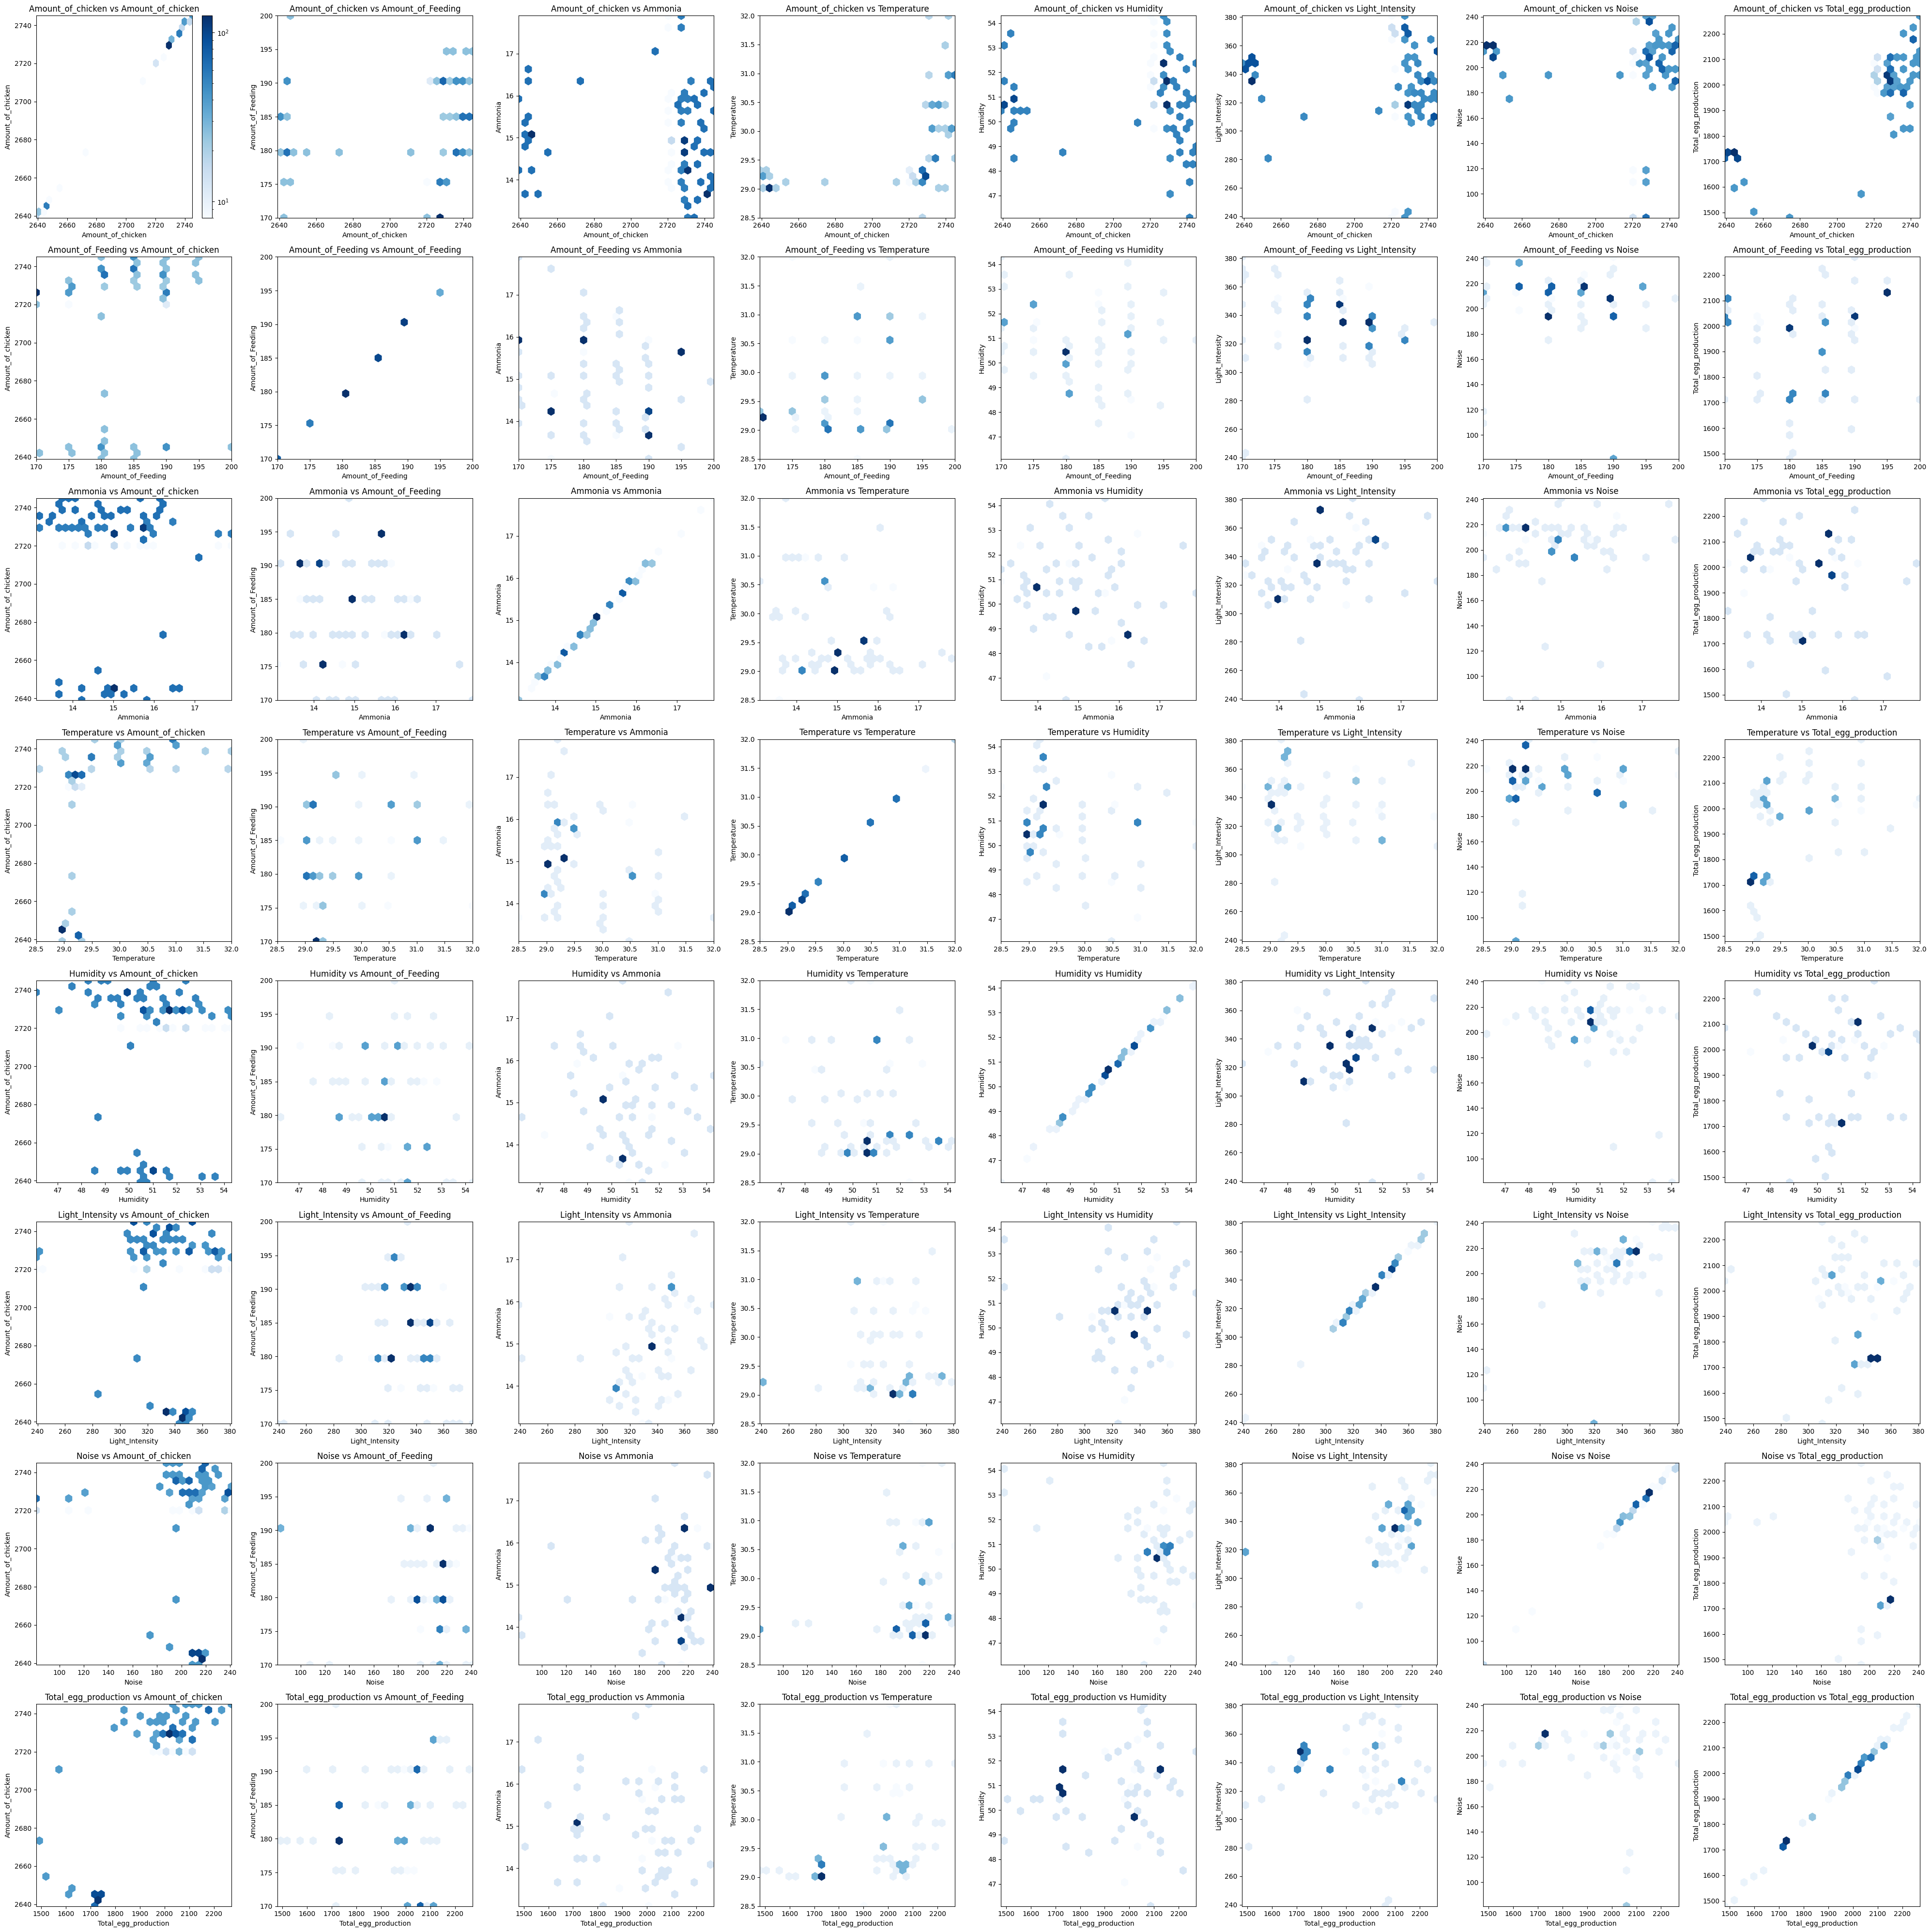

In [9]:
# # Since the user is interested in hexbin plots for comparing each feature against each other, including self-comparisons,
# # let's create hexbin plots for each combination of features.

# # We will use the same "eggs" dataset simulated earlier.

# # Creating hexbin plots for each pair of features.

# # Determine the number of unique pairs for subplot dimensions
# features = eggs.columns.values.tolist()

# n_features = len(features)
# fig, axs = plt.subplots(n_features, n_features, figsize=(5*n_features, 5*n_features))

# for i, feature_a in enumerate(features):
#     for j, feature_b in enumerate(features):
#         # Select the appropriate Axes for the current pair
#         ax = axs[i, j] if n_features > 1 else axs
        
#         # Hexbin plot for the pair
#         hb = ax.hexbin(eggs[feature_a], eggs[feature_b], gridsize=30, cmap='Blues', bins='log')
#         ax.axis([eggs[feature_a].min(), eggs[feature_a].max(), eggs[feature_b].min(), eggs[feature_b].max()])
#         ax.set_title(f'{feature_a} vs {feature_b}')
#         ax.set_xlabel(feature_a)
#         ax.set_ylabel(feature_b)
        
#         # Only show colorbar for the first subplot for clarity
#         if i == 0 and j == 0:
#             fig.colorbar(hb, ax=ax)
        
# fig.tight_layout()
# plt.show()

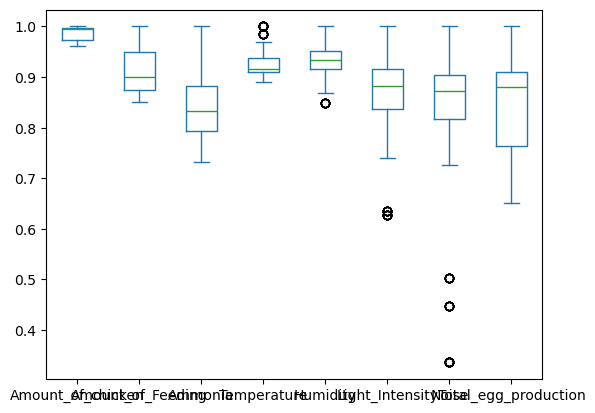

In [39]:
eggs.plot.box()
plt.show()

In [10]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [11]:
for col in eggs.columns:
    eggs[col] /= eggs[col].max()
eggs

,Amount_of_chicken,Amount_of_Feeding,Ammonia,Temperature,Humidity,Light_Intensity,Noise,Total_egg_production
0,0.993807,0.850,0.804469,0.915625,0.952118,0.955381,0.887967,0.931308
1,0.993807,0.875,0.983240,0.915625,0.963168,0.968504,0.975104,0.862175
2,0.993807,0.875,0.837989,0.915625,0.966851,0.979003,0.983402,0.876266
3,0.993807,0.850,0.837989,0.915625,0.915285,0.976378,0.995851,0.887274
4,0.993807,0.850,0.888268,0.912500,0.946593,1.000000,0.983402,0.929987
...,...,...,...,...,...,...,...,...
476,0.996357,0.900,0.804469,0.906250,0.911602,0.895013,0.929461,0.909291
477,0.996357,0.925,0.832402,0.921875,0.933702,0.832021,0.838174,0.969617
478,0.996357,0.900,0.893855,0.921875,0.907919,0.908136,0.817427,0.868340
479,0.995264,0.975,0.748603,0.937500,0.952118,0.853018,0.759336,0.933509


In [100]:
# num_cols = eggs.select_dtypes(include='number').columns.to_list() # select numerical columns

num_cols = eggs.select_dtypes(include='number')
num_cols.describe()

scaler = MinMaxScaler()

num_cols_scaled = scaler.fit_transform(num_cols)
preprocessing = ColumnTransformer([('num', scaler, num_cols.columns)], remainder='passthrough')

In [101]:
feature_names = eggs.columns.values.tolist()
eggs_scaled = preprocessing.fit_transform(eggs)

eggs_prepared = pd.DataFrame(data=eggs_scaled, columns=feature_names)
eggs_prepared1 = eggs_prepared.drop(labels='Total_egg_production', axis=1)

     Amount_of_chicken  Amount_of_Feeding   Ammonia  Temperature  Humidity  \
0             0.839623           0.000000  0.270833     0.228571  0.682927   
1             0.839623           0.166667  0.937500     0.228571  0.756098   
2             0.839623           0.166667  0.395833     0.228571  0.780488   
3             0.839623           0.000000  0.395833     0.228571  0.439024   
4             0.839623           0.000000  0.583333     0.200000  0.646341   
..                 ...                ...       ...          ...       ...   
476           0.905660           0.333333  0.270833     0.142857  0.414634   
477           0.905660           0.500000  0.375000     0.285714  0.560976   
478           0.905660           0.333333  0.604167     0.285714  0.390244   
479           0.877358           0.833333  0.062500     0.428571  0.682927   
480           0.877358           0.166667  0.229167     0.428571  0.426829   

     Light_Intensity    Noise  
0           0.880282  0.83125  